In [1]:
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from keras.callbacks import  EarlyStopping, ModelCheckpoint
import seaborn as sns

In [2]:
# Cargar el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train_flat = x_train.reshape(x_train.shape[0], 32*32*3)

# Crear DataFrames para los datos de entrenamiento y prueba
df = pd.DataFrame(x_train_flat)
df['label'] = y_train


# Mostrar las primeras filas del DataFrame de entrenamiento
print(df.head())

     0    1    2    3    4    5    6    7    8    9  ...  3063  3064  3065  \
0   59   62   63   43   46   45   50   48   43   68  ...   216   184   140   
1  154  177  187  126  137  136  105  104   95  102  ...   143   133   139   
2  255  255  255  253  253  253  253  253  253  253  ...    78    85    83   
3   28   25   10   37   34   19   38   35   20   42  ...    54    47    28   
4  170  180  198  168  178  196  177  185  203  183  ...    75    79    82   

   3066  3067  3068  3069  3070  3071  label  
0   151   118    84   123    92    72      6  
1   143   134   142   143   133   144      9  
2    79    85    83    80    86    84      9  
3    63    56    37    72    65    46      4  
4    71    75    78    73    77    80      1  

[5 rows x 3073 columns]


In [4]:
type(x_train)

numpy.ndarray

In [5]:
print("La Media en X_train es de: ",np.mean(x_train))
print("La Media en X_test es de: ",np.mean(x_test))
print("La Media en y_train es de: ",np.mean(y_train))
print("La Media en y_test es de: ",np.mean(y_test))

La Media en X_train es de:  120.70756512369792
La Media en X_test es de:  121.52915475260417
La Media en y_train es de:  4.5
La Media en y_test es de:  4.5


In [7]:
# Vamos a ver el rango de las variables
print('Valores mínimos variables: ', x_train.min(axis=0))
print('Valores máximos variables: ', x_train.max(axis=0))

Valores mínimos variables:  [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Valores máximos variables:  [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[2

In [8]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

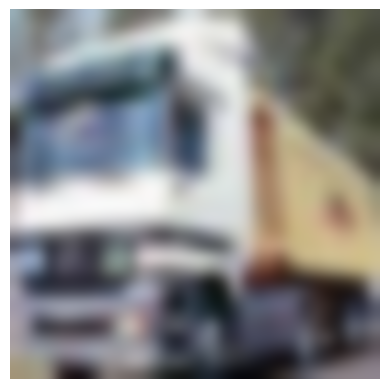

In [26]:
imagen = x_train[1]
plt.imshow(imagen, interpolation='bicubic')
# Mostrar la imagen
plt.axis('off')  # Ocultar los ejes
plt.show()

In [10]:
index2 = np.where(y_train == 1)[0][0]


In [11]:
y_train[0][0]


6

In [12]:
label_to_text = {0:'Avión', 1:'Automóvil', 2:'Pájaros', 3:'Gatos', 4: 'Ciervos', 5:'Perros', 6:'Ranas', 7:'Caballos', 8:'Barcos', 9: 'Camiones'}

label_to_text[0]

'Avión'

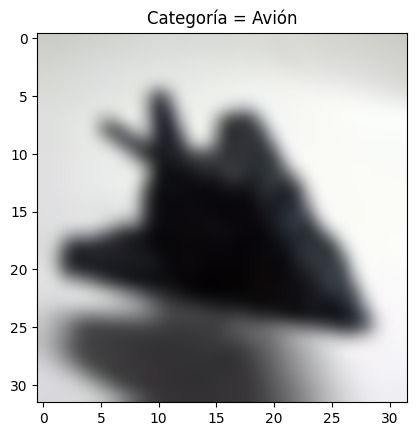

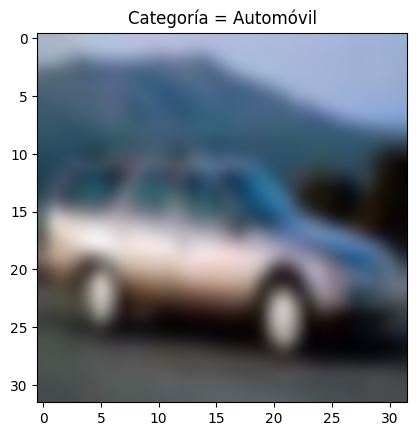

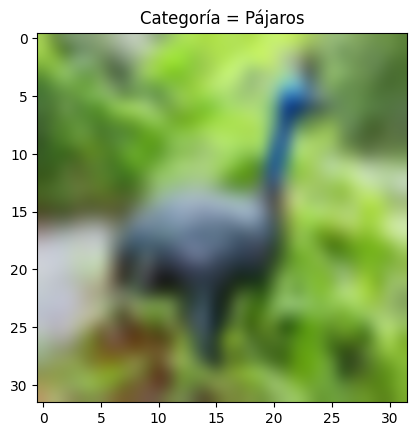

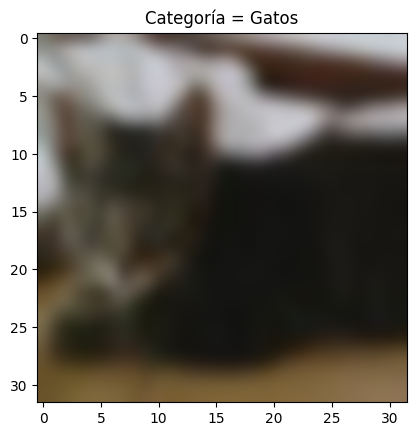

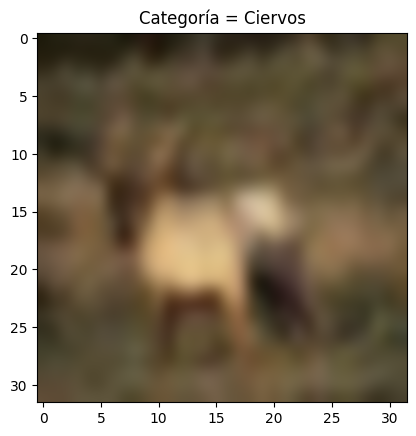

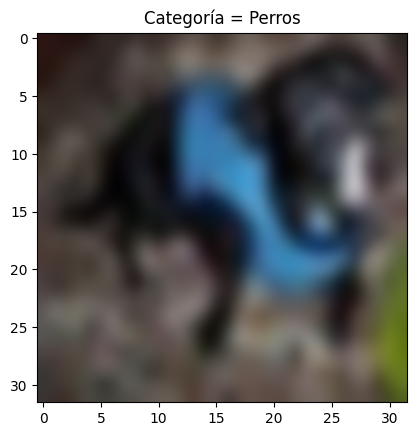

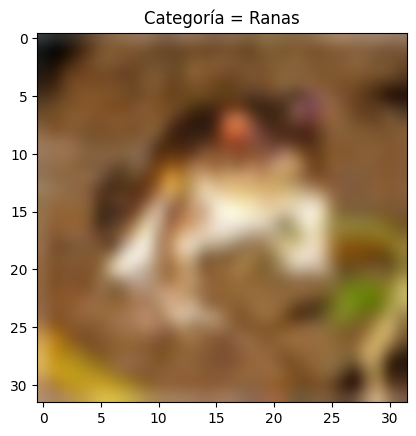

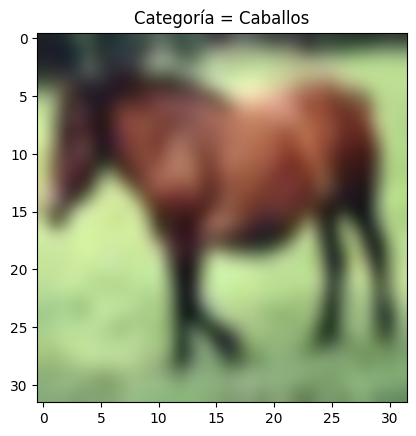

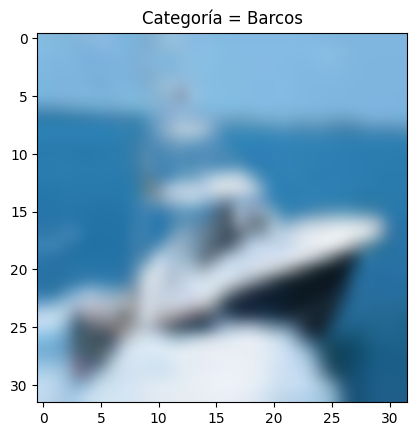

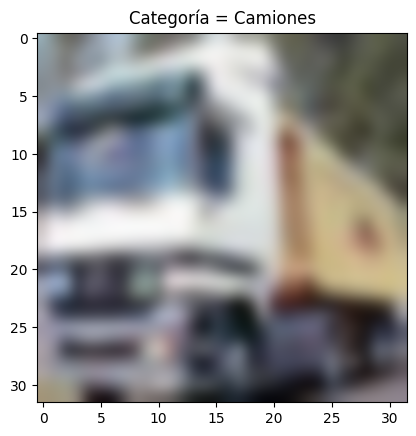

In [13]:
for i in range(10):
    # Encontrar el primer índice de la categoría i
    index = np.where(y_train == i)[0][0]
    imagen = x_train[index]
    plt.imshow(imagen, interpolation='bicubic')
    plt.title("Categoría = " + (label_to_text[i]))
    plt.show()

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
# Preprocesamiento de los datos
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:

# Construir la red neuronal convolucional
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', ))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', ))
model.add(Conv2D(64, (3, 3), activation='relu', ))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



In [17]:
checkpointer = ModelCheckpoint(filepath ="modeloPesos.hdf5", verbose = 1, save_best_only = True)
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=64, callbacks=[checkpointer])




Epoch 1/2


781/782 [============================>.] - ETA: 0s - loss: 1.5577 - accuracy: 0.4278
Epoch 1: val_loss improved from inf to 1.27388, saving model to modeloPesos.hdf5
782/782 [==============================] - 32s 39ms/step - loss: 1.5576 - accuracy: 0.4278 - val_loss: 1.2739 - val_accuracy: 0.5439
Epoch 2/2
  3/782 [..............................] - ETA: 23s - loss: 1.2685 - accuracy: 0.5260

C:\Users\Adri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


782/782 [==============================] - ETA: 0s - loss: 1.1779 - accuracy: 0.5794
Epoch 2: val_loss improved from 1.27388 to 1.04890, saving model to modeloPesos.hdf5
782/782 [==============================] - 31s 40ms/step - loss: 1.1779 - accuracy: 0.5794 - val_loss: 1.0489 - val_accuracy: 0.6281


In [18]:
# Evaluar el modelo
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0489 - accuracy: 0.6281


In [19]:
history.history

{'loss': [1.5576374530792236, 1.1778665781021118],
 'accuracy': [0.427839994430542, 0.5794399976730347],
 'val_loss': [1.2738821506500244, 1.048901915550232],
 'val_accuracy': [0.5439000129699707, 0.6280999779701233]}

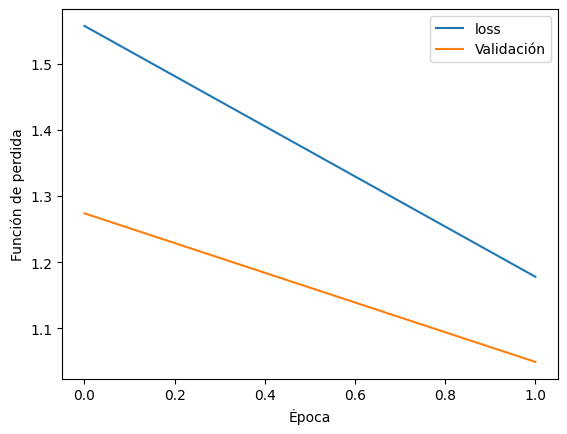

In [20]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="Validación")
plt.ylabel('Función de perdida')
plt.xlabel('Época')
plt.legend(loc="upper right")

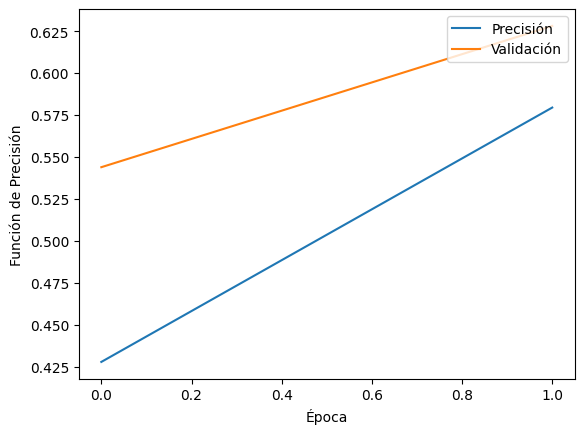

In [21]:
plt.plot(history.history['accuracy'], label="Precisión")
plt.plot(history.history['val_accuracy'], label="Validación")
plt.ylabel('Función de Precisión')
plt.xlabel('Época')
plt.legend(loc="upper right")

In [22]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)


313/313 [==============================] - 2s 5ms/step


<Axes: >

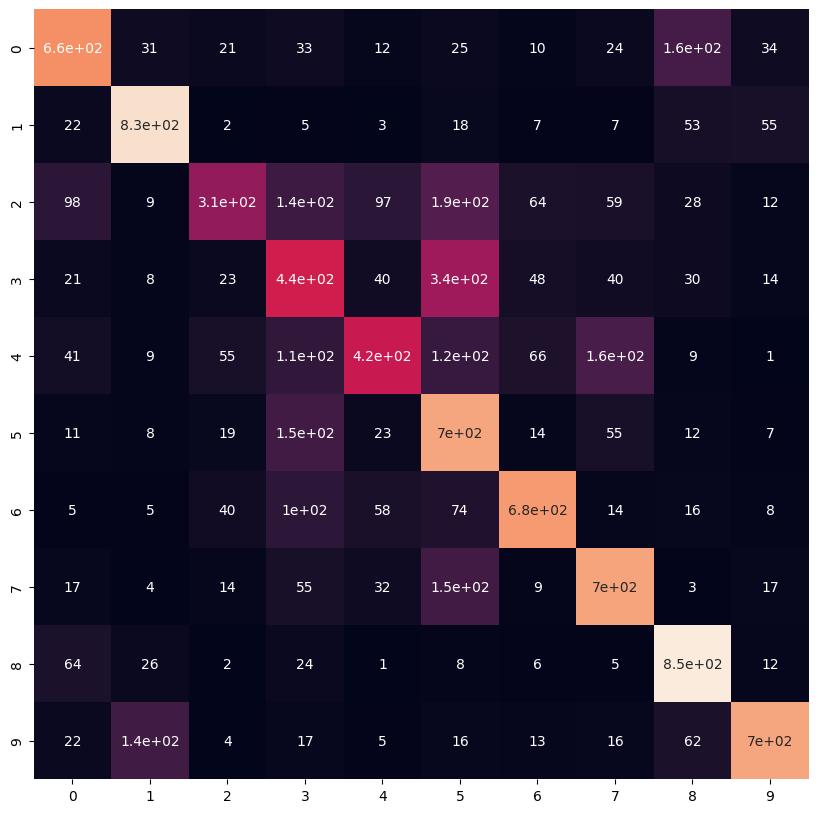

In [23]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_labels)
plt.figure(figsize = (10, 10))
sns.heatmap(conf_matrix, annot = True, cbar = False)

In [24]:
# Calcula el informe de clasificación
class_report = classification_report(y_true=y_test, y_pred=y_pred_labels)
print(class_report)


              precision    recall  f1-score   support

           0       0.69      0.66      0.67      1000
           1       0.77      0.83      0.80      1000
           2       0.63      0.31      0.42      1000
           3       0.41      0.44      0.42      1000
           4       0.61      0.42      0.50      1000
           5       0.43      0.70      0.53      1000
           6       0.74      0.68      0.71      1000
           7       0.65      0.70      0.67      1000
           8       0.70      0.85      0.77      1000
           9       0.81      0.70      0.75      1000

    accuracy                           0.63     10000
   macro avg       0.64      0.63      0.62     10000
weighted avg       0.64      0.63      0.62     10000



In [25]:
# Guardar la arquitectura del modelo en un JSON para su futuro uso

model_json = model.to_json()
with open("cifar.json","w") as json_file:
  json_file.write(model_json)